# Lab 4 - 24/03/25
Decision Tree

In [4]:
from google.colab import files
uploaded=files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



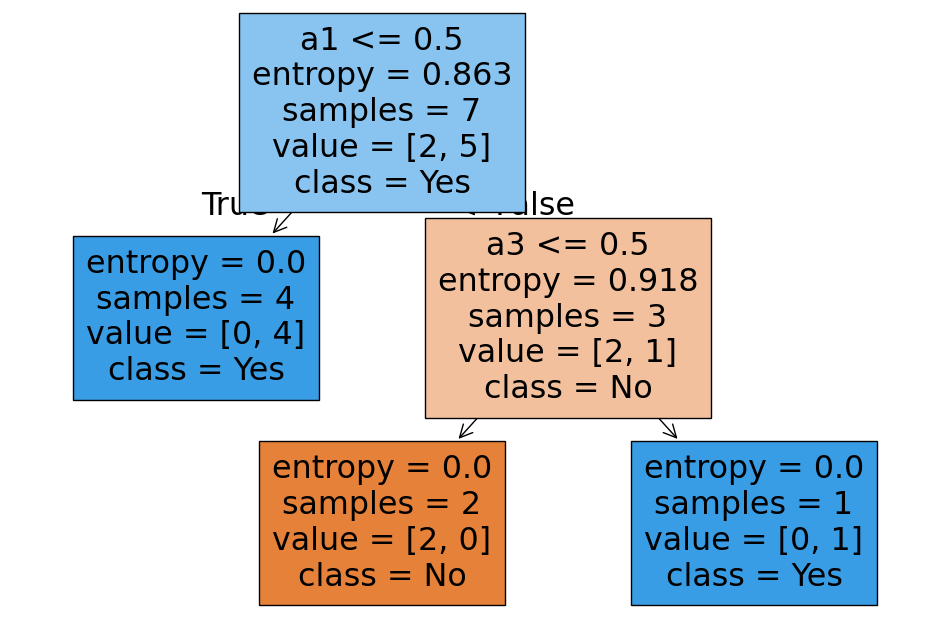

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])

plt.show()

# To Do: Implementation – Decision Tree(for Classification)

Write Python code to implement the following. Consider dataset files as “iris.csv” and “drug.csv”

1. Build a DecisionTree classifier to classify IRIS flower dataset
Use 80% of data for training and 20% for testing.
Display accuracy score and confusion matrix of the trained model on test data.

2. Build a DecisionTree classifier to classify Drugdataset
Use 80% of data for training and 20% for testing.
Display accuracy score and confusion matrix of the trained model on test data.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the IRIS dataset
iris = pd.read_csv("iris.csv")
X_iris = iris.iloc[:, :-1]  # Features
y_iris = iris.iloc[:, -1]   # Target

# Split the dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
clf_iris = DecisionTreeClassifier()
clf_iris.fit(X_train_iris, y_train_iris)

# Make predictions
y_pred_iris = clf_iris.predict(X_test_iris)

# Evaluate the model
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("IRIS Dataset - Decision Tree Classifier")
print(f"Accuracy: {accuracy_iris:.2f}")
print("Confusion Matrix:")
print(conf_matrix_iris)

# Load the Drug dataset
drug = pd.read_csv("drug.csv")
X_drug = drug.iloc[:, :-1]  # Features
y_drug = drug.iloc[:, -1]   # Target

# Convert categorical columns into numeric using Label Encoding
label_encoders = {}  # Store label encoders for later inverse transformation if needed
categorical_columns = ["Sex", "BP", "Cholesterol"]

for col in categorical_columns:
    le = LabelEncoder()
    X_drug[col] = le.fit_transform(X_drug[col])
    label_encoders[col] = le  # Store the encoder

# Split the dataset
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
clf_drug = DecisionTreeClassifier()
clf_drug.fit(X_train_drug, y_train_drug)

# Make predictions
y_pred_drug = clf_drug.predict(X_test_drug)

# Evaluate the model
accuracy_drug = accuracy_score(y_test_drug, y_pred_drug)
conf_matrix_drug = confusion_matrix(y_test_drug, y_pred_drug)

print("\nDrug Dataset - Decision Tree Classifier")
print(f"Accuracy: {accuracy_drug:.2f}")
print("Confusion Matrix:")
print(conf_matrix_drug)

IRIS Dataset - Decision Tree Classifier
Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Drug Dataset - Decision Tree Classifier
Accuracy: 1.00
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


# To Do: Implementation – Decision Tree(For Classification)

Write Python code to implement the following. Consider dataset file “petrol_consumption.csv”

Build a RegressionTree to predict petrol consumption

Use 80% of data for training and 20% for testing.

Display “Mean Absolute Error, Mean Squared Error, Root Mean Squared Error” for test data.

Regression Tree - Petrol Consumption Prediction
Mean Absolute Error: 97.80
Mean Squared Error: 18369.60
Root Mean Squared Error: 135.53



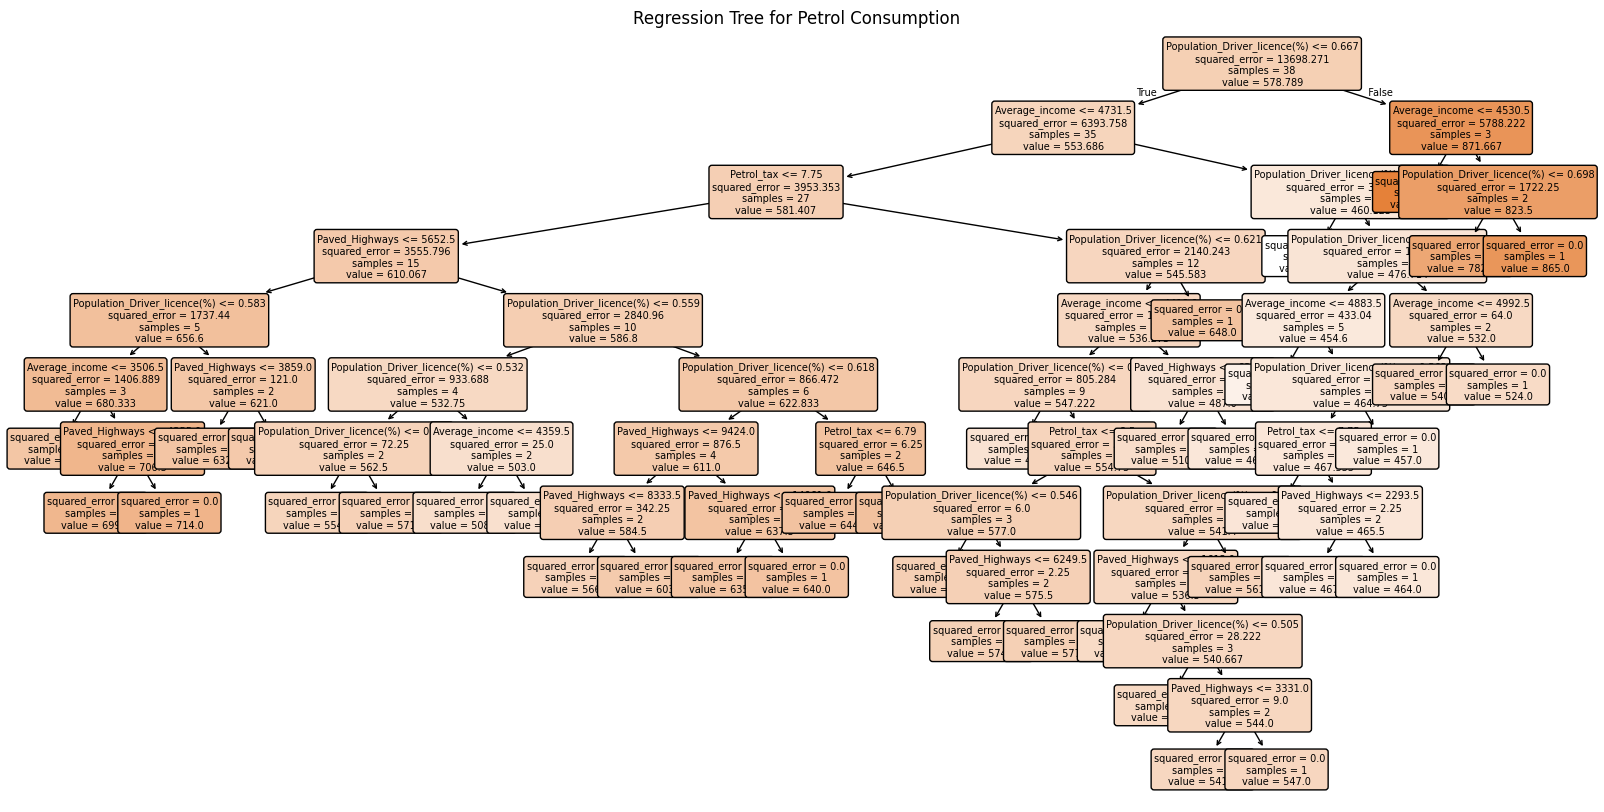

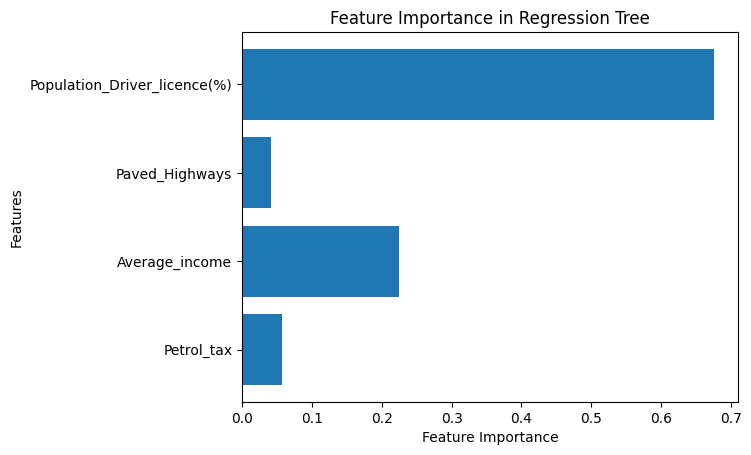

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Petrol Consumption dataset
petrol = pd.read_csv("petrol_consumption.csv")

# Separate features and target
X_petrol = petrol.iloc[:, :-1]  # Features
y_petrol = petrol.iloc[:, -1]   # Target

# Split the dataset
X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

# Train the Regression Tree model
regressor = DecisionTreeRegressor()
regressor.fit(X_train_petrol, y_train_petrol)

# Make predictions
y_pred_petrol = regressor.predict(X_test_petrol)

# Evaluate the model
mae = mean_absolute_error(y_test_petrol, y_pred_petrol)
mse = mean_squared_error(y_test_petrol, y_pred_petrol)
rmse = np.sqrt(mse)

print("Regression Tree - Petrol Consumption Prediction")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}\n")

plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X_petrol.columns, fontsize=7, rounded=True)
plt.title("Regression Tree for Petrol Consumption")
plt.show()
print("\n")

# Get feature importance
importance = regressor.feature_importances_

# Plot feature importance
plt.barh(range(len(importance)), importance, tick_label=X_petrol.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Regression Tree")
plt.show()